In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [3]:
data=pd.read_csv("/content/drive/MyDrive/A K Sinha/Diabetes model/diabetes (1).csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data preprocessing

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

dataset column or variable may have invalid zero value which not makes sens and also not discoverable as null 

Lets change all the zero into **"null"** so that it could be discoverable as null value

In [6]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Again checking null value in dataset after changing zero into null

In [7]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

we found null values in many columns so lets relace null value with columns mean value.

In [8]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace = True)

Again checking null value available or not

In [9]:
data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we got it we have no null value in dataset

# **1.** Classify the patients in different age group suffering with diabetic

Counting top age groups data that we have

In [10]:
data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data_copy.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

making some **55+** age group common as **55**

In [12]:
#for x in range (55, 85):
 # if(x>55):
  # data_copy[['Age']]=data_copy[['Age']].replace(x,55)
  #x=x+1    

## Creating three types of age group categorial dataset
1. Young Age (0 to 35 years)
2. Middle Age Adult (36 to 55 years)
3. old age (after 56 years)

### Createing new dataset of `Young age` group ( 0 to 35 years)

In [13]:
filtered_values = np.where((data_copy['Age']<=35))
data_age_young=data_copy.loc[filtered_values].copy()
data_age_young.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0


### Createing new dataset of `middle age` group ( 35 to 55 years)

In [14]:
filtered_values = np.where((data_copy['Age']>=35) & (data_copy['Age']<=55))
data_middle_age=data_copy.loc[filtered_values].copy()
data_middle_age.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.600000,0.627,50,1
8,2,197.0,70.0,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.0,29.15342,155.548223,32.457464,0.232,54,1
14,5,166.0,72.0,19.00000,175.000000,25.800000,0.587,51,1
21,8,99.0,84.0,29.15342,155.548223,35.400000,0.388,50,0


### Createing new dataset of `old age` group (  55 or more years)

In [15]:
filtered_values = np.where((data_copy['Age']>=55))
data_old_age=data_copy.loc[filtered_values].copy()
data_old_age.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139.0,80.0,29.15342,155.548223,27.1,1.441,57,0
13,1,189.0,60.0,23.00000,846.000000,30.1,0.398,59,1
28,13,145.0,82.0,19.00000,110.000000,22.2,0.245,57,0
30,5,109.0,75.0,26.00000,155.548223,36.0,0.546,60,0
39,4,111.0,72.0,47.00000,207.000000,37.1,1.390,56,1


## visualise which `age group` more have **`diabetic`** patient
1. young age
2. middle age
3. old age

#### 1. To visualise diabetic patient in young age group, Creating new dataset of `young age` grop of `diabetic`. 

In [16]:
filtered_values = np.where((data_age_young['Outcome']==1))
data_age_young_dia=data_age_young.iloc[filtered_values].copy()
data_age_young_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64.000000,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.000000,32.00000,88.000000,31.0,0.248,26,1
11,10,168.0,74.000000,29.15342,155.548223,38.0,0.537,34,1
15,7,100.0,72.405184,29.15342,155.548223,30.0,0.484,32,1


Plotting histogram to visualise dabetic patient in young age group

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2880b34310>]],
      dtype=object)

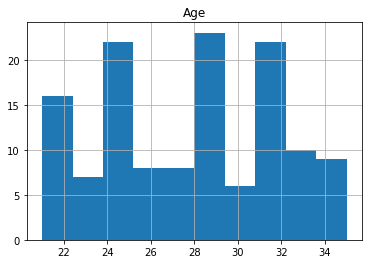

In [17]:
data_age_young_dia.hist('Age')

`In young age group 24,29 and 32 age person have more diabrtic.`

#### 2. To visualise middle age diabetic patient, Creating new dataset of `middle age` grop.

In [18]:
filtered_values = np.where((data_middle_age['Outcome']==1))
data_middle_age_dia=data_middle_age.iloc[filtered_values].copy()
data_middle_age_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.600000,0.627,50,1
8,2,197.0,70.0,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.0,29.15342,155.548223,32.457464,0.232,54,1
14,5,166.0,72.0,19.00000,175.000000,25.800000,0.587,51,1
22,7,196.0,90.0,29.15342,155.548223,39.800000,0.451,41,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28805bad60>]],
      dtype=object)

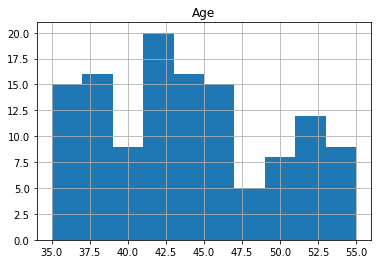

In [19]:
data_middle_age_dia.hist('Age')

`In young middle age group 35,37,42,45 and 56 age person have more diabrtic.`

#### 3. To visualise middle age diabetic patient, Creating new dataset of old age group.

In [20]:
filtered_values = np.where((data_old_age['Outcome']==1))
data_old_age_dia=data_old_age.iloc[filtered_values].copy()
data_old_age_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.00000,846.000000,30.1,0.398,59,1
39,4,111.0,72.0,47.00000,207.000000,37.1,1.390,56,1
53,8,176.0,90.0,34.00000,300.000000,33.7,0.467,58,1
93,4,134.0,72.0,29.15342,155.548223,23.8,0.277,60,1
115,4,146.0,92.0,29.15342,155.548223,31.2,0.539,61,1


Text(0.5, 1.0, 'age histogram of old age group')

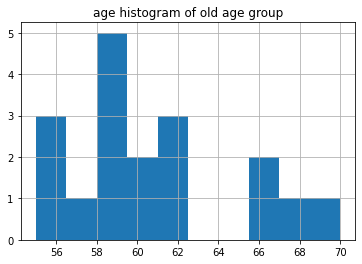

In [22]:
data_old_age_dia.hist('Age')
plt.title('age histogram of old age group')

`In young old age group 56,59 and 62 age person have more diabrtic.`

`but i have a problem there is all group have both output "0" and "1" diabetic and non diabetic so how we could classifie different age groups with ref of output`

# **2.** Prepare the visualization of data and interpretation .
*   data visualisation of top data available in columns



## data visualisation of top data available in columns

### AGE GROUPS

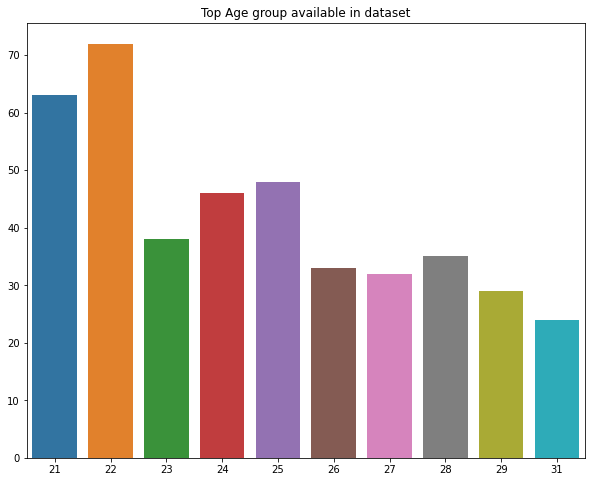

In [69]:
Age=data_copy.Age.value_counts().head(10)        # stores number of top Age group available in "Age" column in Language var

plt.figure(figsize=(10,8))                          # plt (matplotlib library) command for ploting graph of size 10x8

plt.title("Top Age group available in dataset")  # Adding title
sns.barplot(x=Age.index,y=Age.values)

### **"Output"** column

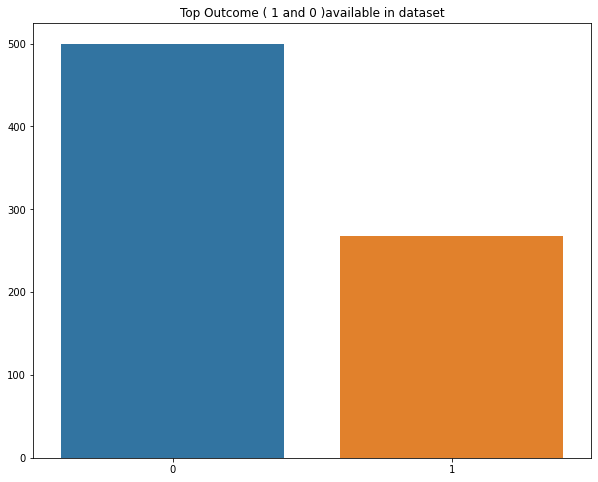

In [70]:
Outcome=data_copy.Outcome.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("Top Outcome ( 1 and 0 )available in dataset")  
sns.barplot(x=Outcome.index,y=Outcome.values)

### **BMI** column

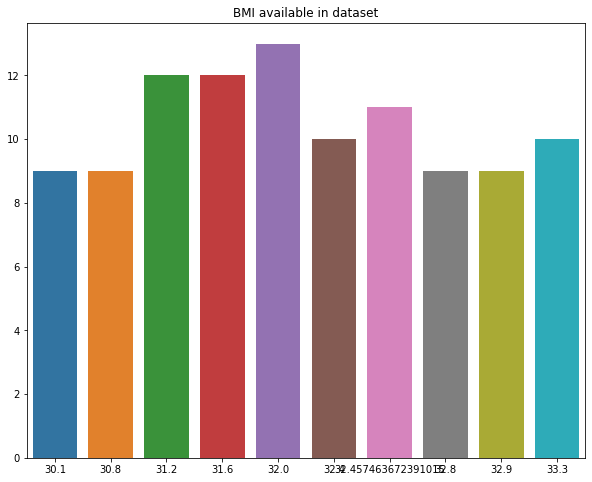

In [71]:
BMI=data_copy.BMI.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("BMI available in dataset")  
sns.barplot(x=BMI.index,y=BMI.values)

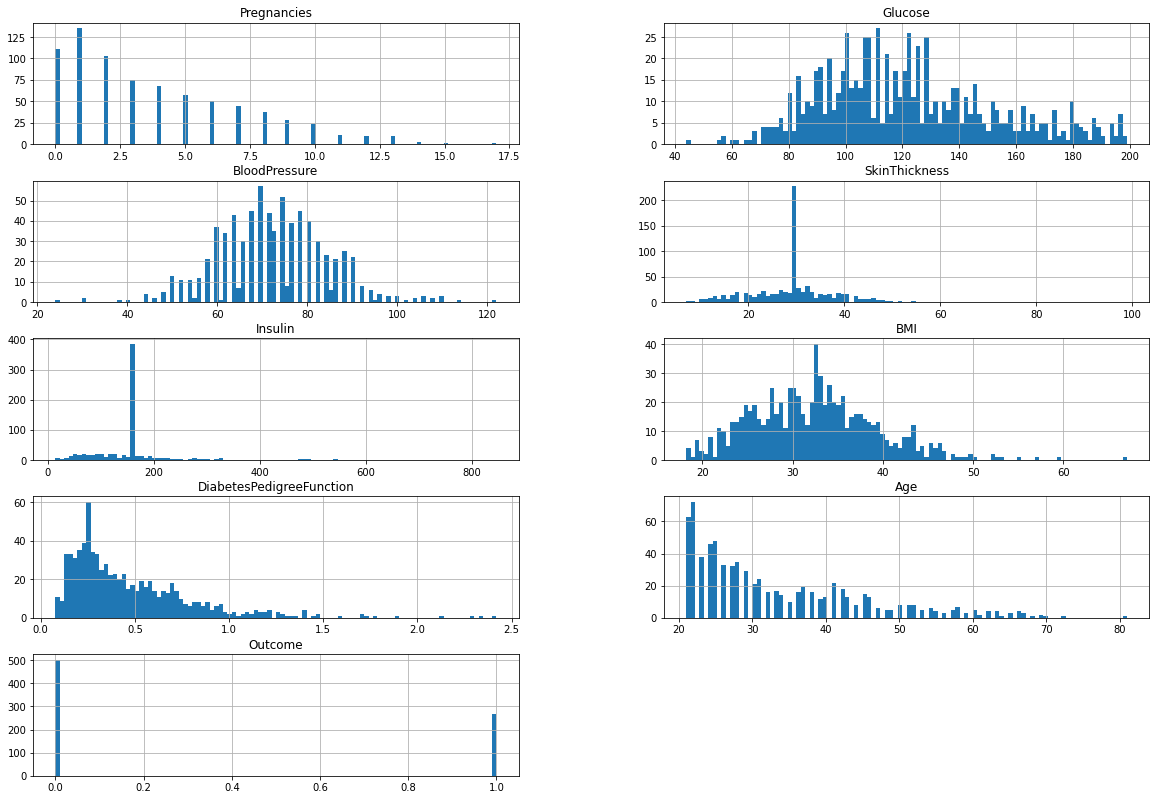

In [72]:
data_copy.hist(stacked=False, bins=100, figsize=(20,40), layout=(14,2));

Correlation visualization

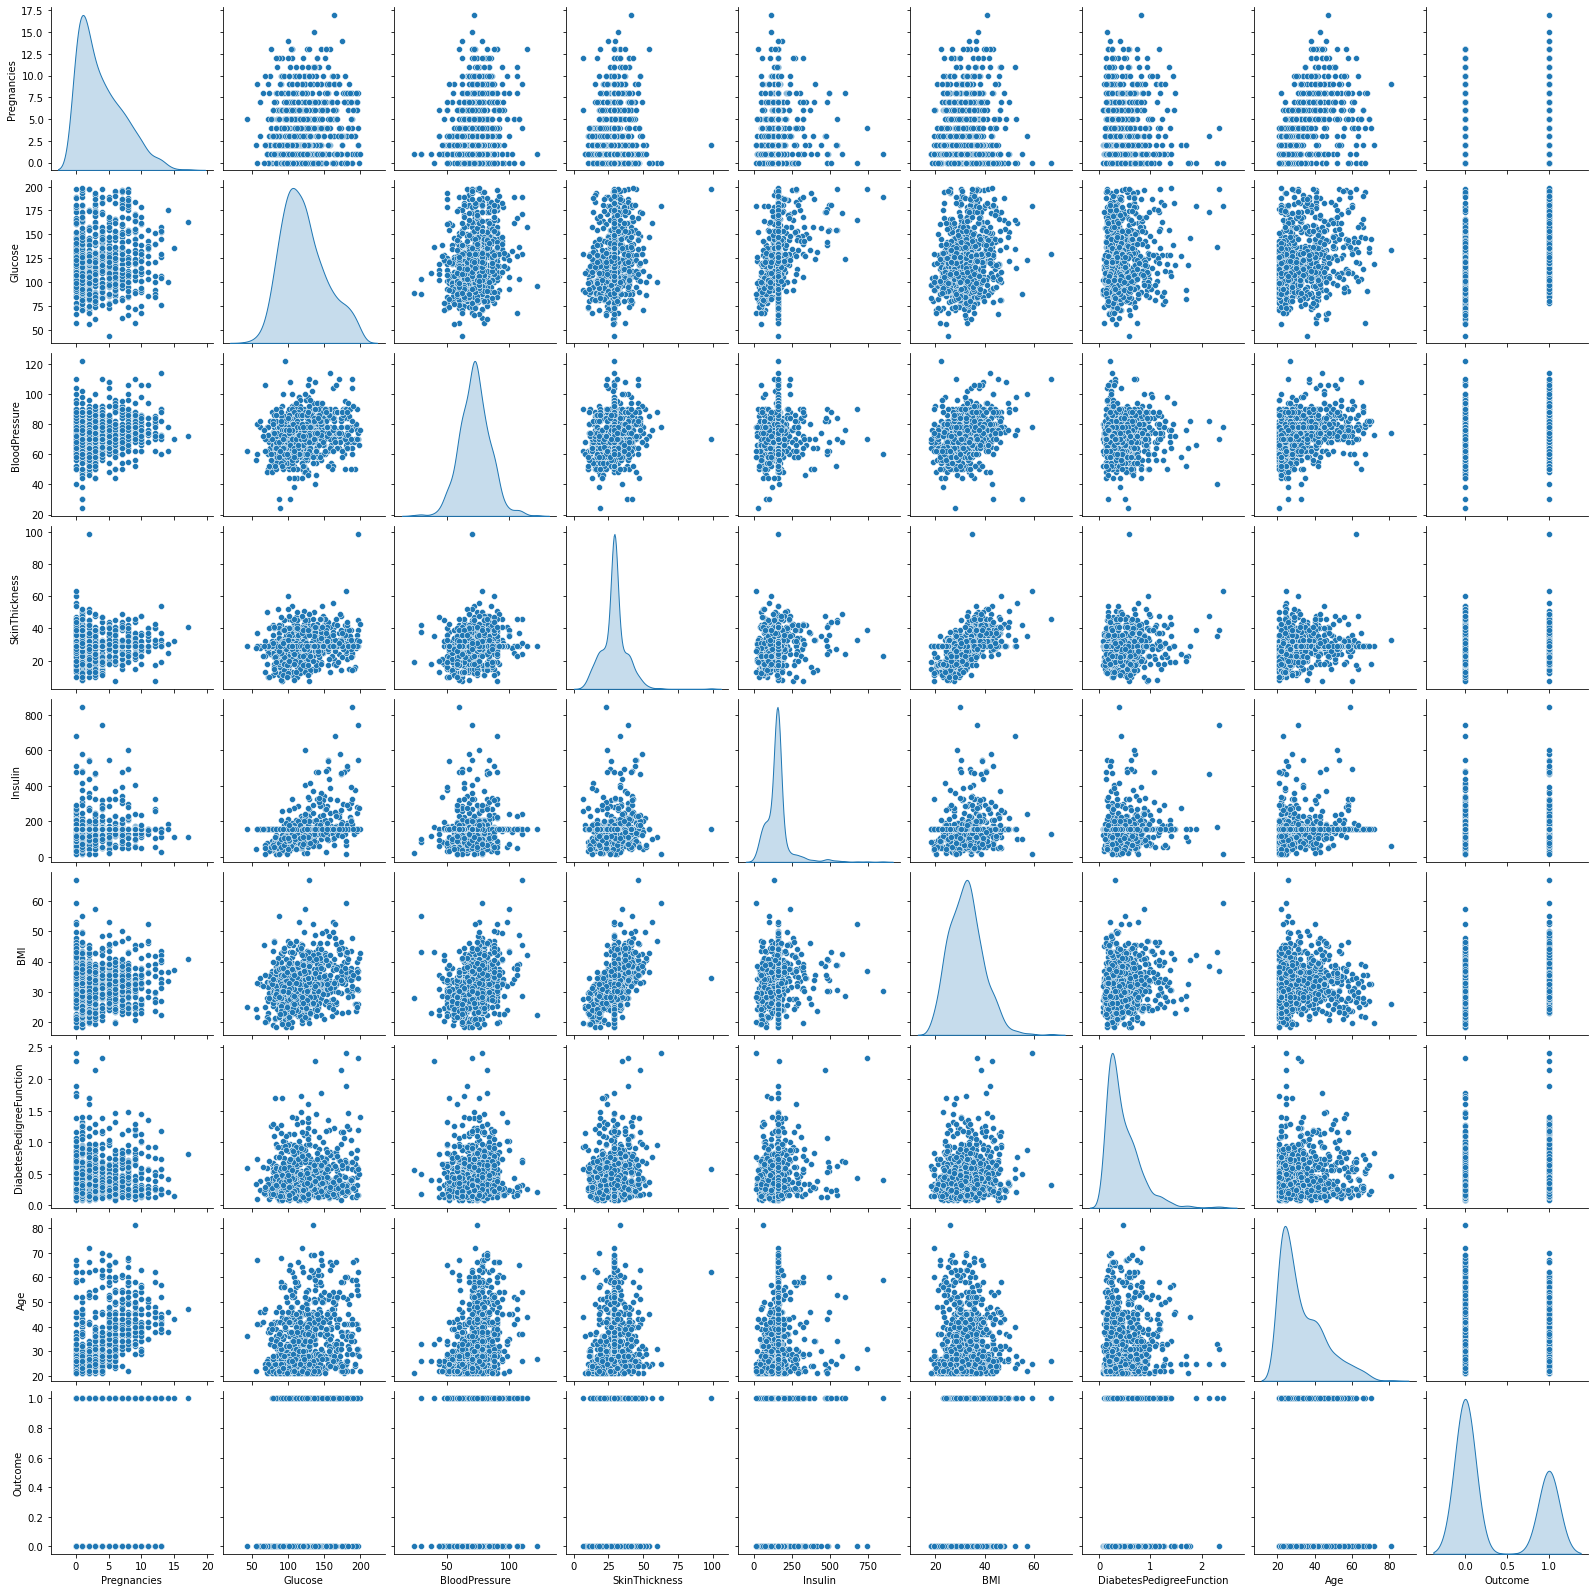

In [73]:
sns.pairplot(data_copy,diag_kind='kde')           # kde changes smooth curve

# **3.** Compute meaningful statistical parameters.

In [74]:
data_copy.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **4.** Find the significant health index of diabetic patients.

## For **`diabetic`** patient only 

In [75]:
filtered_values = np.where((data_copy['Outcome']==1))
data_diabetic=data_copy.loc[filtered_values].copy()
data_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,66,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1


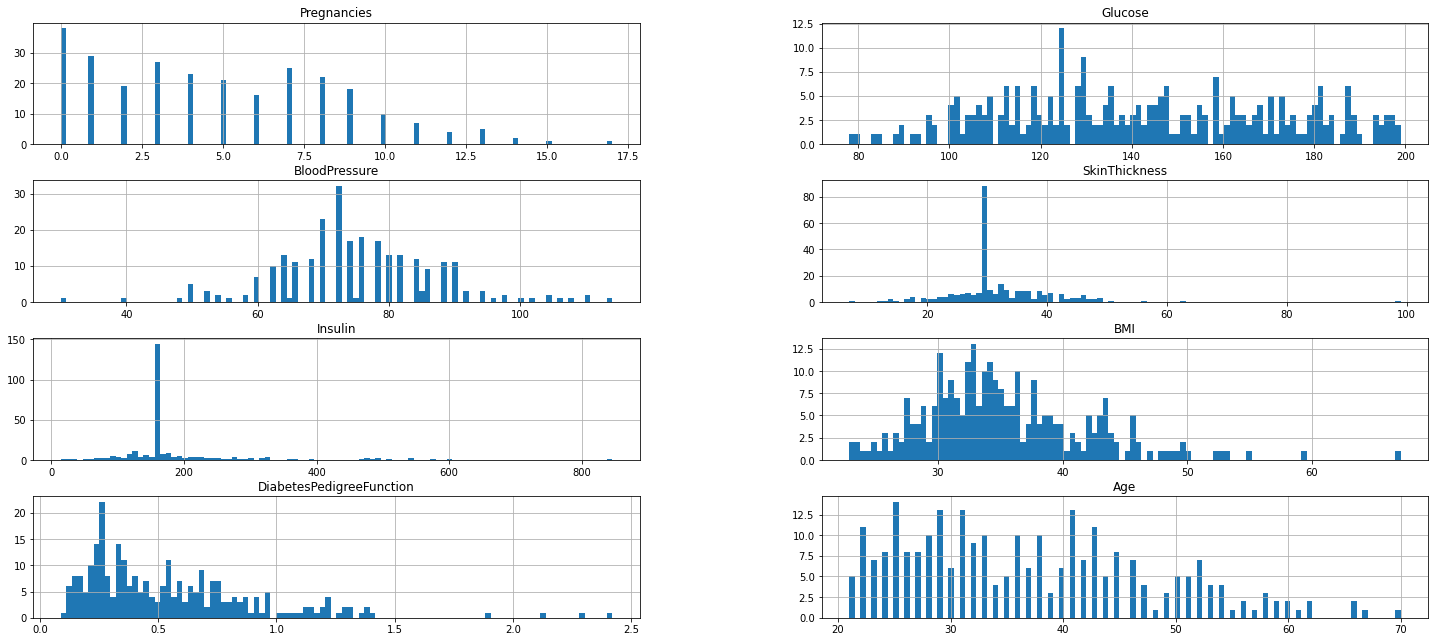

In [76]:
data_diabetic.iloc[:,0:8].hist(stacked=False, bins=100, figsize=(25,40), layout=(14,2));

## For **`Nondiabetic`** only

In [77]:
filtered_values = np.where((data_copy['Outcome']==0))
data_nondiabetic=data_copy.loc[filtered_values].copy()
data_nondiabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.000000,29.15342,155.548223,22.5,0.142,33,0
763,10,101.0,76.000000,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.000000,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.000000,23.00000,112.000000,26.2,0.245,30,0


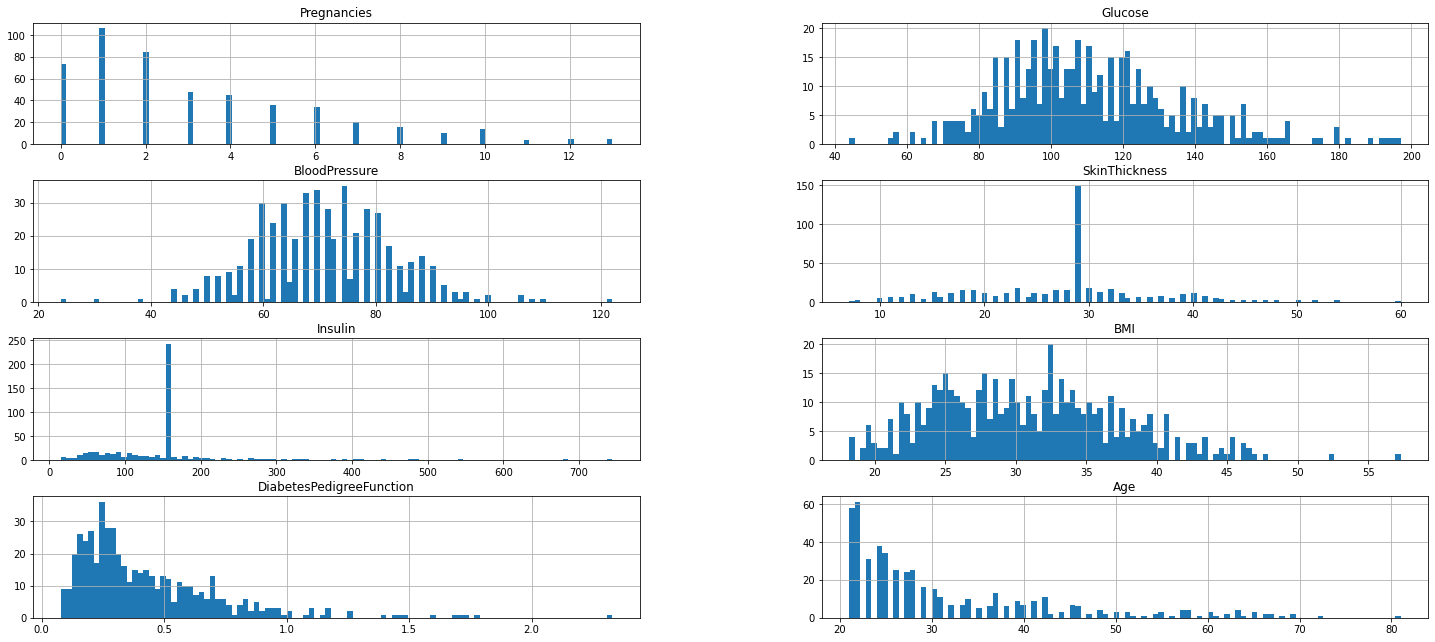

In [78]:
data_nondiabetic.iloc[:,0:8].hist(stacked=False, bins=100, figsize=(25,40), layout=(14,2));

## comparing seprate index of dia and non diabetic

### Comparing for **`Insulin`**

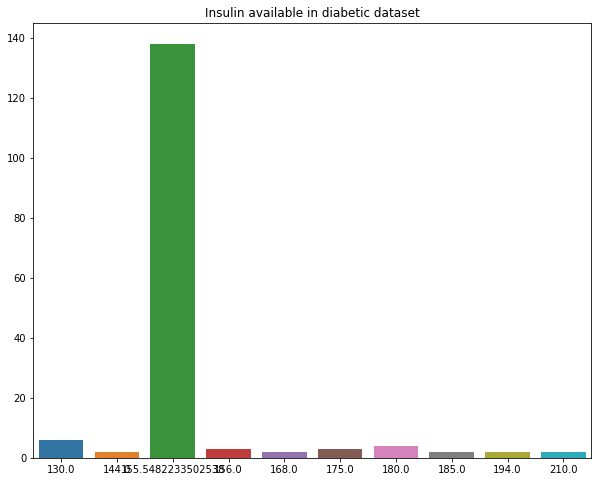

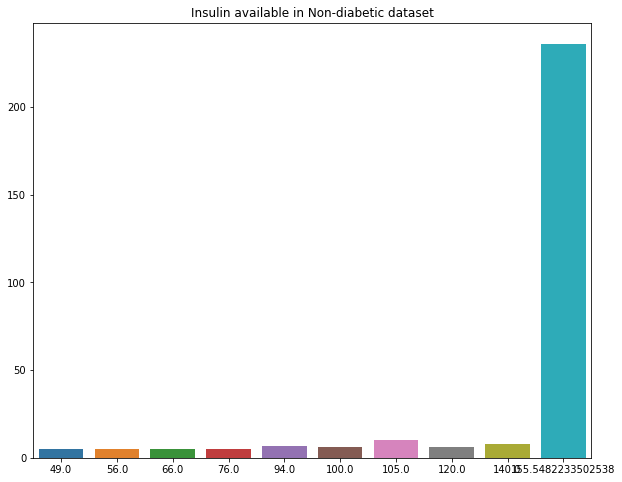

In [79]:
Insulin=data_diabetic.Insulin.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("Insulin available in diabetic dataset")  
sns.barplot(x=Insulin.index,y=Insulin.values)

Insulin=data_nondiabetic.Insulin.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("Insulin available in Non-diabetic dataset")  
sns.barplot(x=Insulin.index,y=Insulin.values)

### Comparing for **`BloodPressure`**

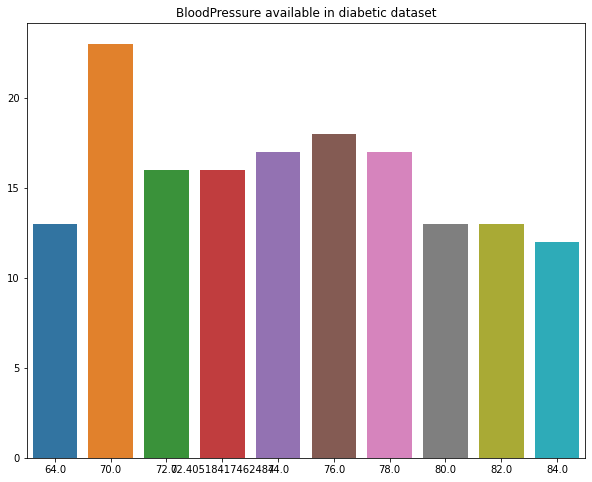

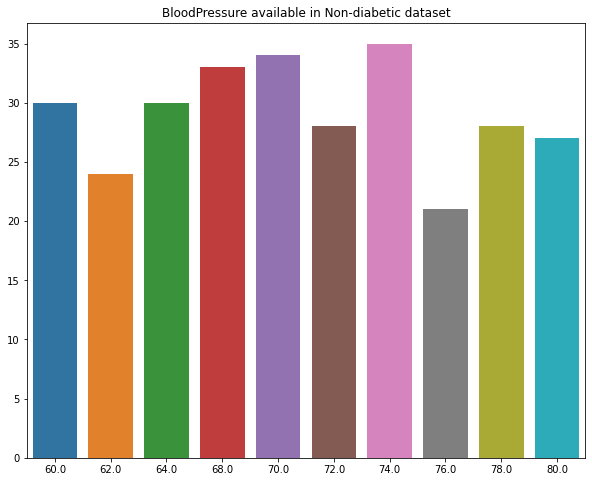

In [80]:
BloodPressure=data_diabetic.BloodPressure.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("BloodPressure available in diabetic dataset")  
sns.barplot(x=BloodPressure.index,y=BloodPressure.values)

BloodPressure=data_nondiabetic.BloodPressure.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("BloodPressure available in Non-diabetic dataset")  
sns.barplot(x=BloodPressure.index,y=BloodPressure.values)

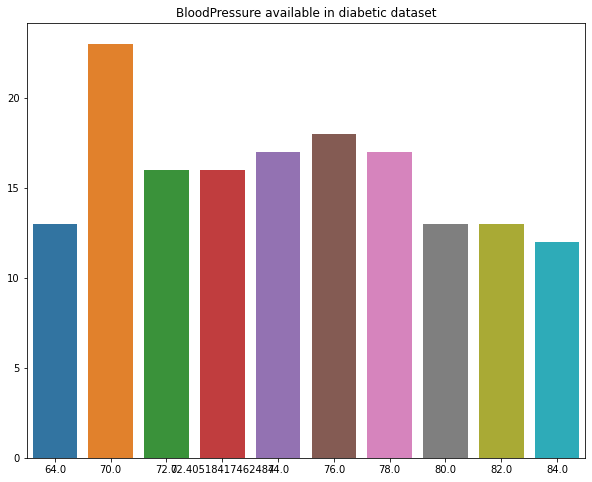

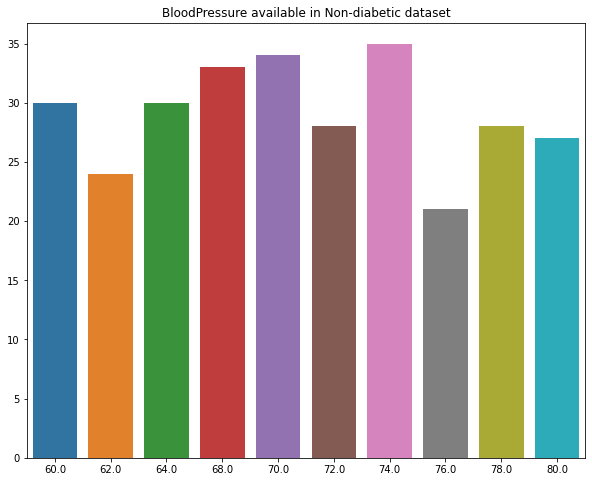

In [81]:
BloodPressure=data_diabetic.BloodPressure.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("BloodPressure available in diabetic dataset")  
sns.barplot(x=BloodPressure.index,y=BloodPressure.values)

BloodPressure=data_nondiabetic.BloodPressure.value_counts().head(10)       
plt.figure(figsize=(10,8))                          
plt.title("BloodPressure available in Non-diabetic dataset")  
sns.barplot(x=BloodPressure.index,y=BloodPressure.values)

# **5.** Develop a suitable model of diabetics in patients.

In [82]:
data=data_copy.copy()

## Linear Regression mode:

In [83]:
x=data.iloc[:,0:8]
y=data['Outcome']

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()               #calling linear Regression function
reg.fit(x_train, y_train)              # making model lr using x_train and y_train
y_pred= reg.predict(x_test)            # predicted value of y applying linear regression algorithym using x_test
print( "ML Model Test score=",reg.score(x_test,y_test))

#print("Regressin model coefficient of all columns",reg.coef_)

ML Model Test score= 0.34349996005395633


## Logistic regression model:

calculate diabetic ratio

In [86]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Afte above operation, we can see here in 'class' column there is 500-- nondiabetic and 268-- diabetic data, lets find its percentage of categorical value:

In [ ]:
dia=268
nondia=500
sum=500+278
per_dia=(dia/sum)*100
per_nondia=(nondia/sum)*100
print('% of diabetic patent--',per_dia, '%')
print('% of non_diabetic patent--',per_nondia, '%')

% of diabetic patent-- 34.447300771208226 %
% of non_diabetic patent-- 64.26735218508998 %


we found 34.44% diabetic patent and 64.26% nin_diabetic patent due to this we willuse 30% data for testing and 70% data for training


In [87]:
from sklearn.model_selection import train_test_split
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [88]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

In [89]:
# predic value
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [90]:
model_score=model.score(x_test, y_test)
model_score

0.7792207792207793

lets plot confusion matrix to check how much errors it have in prediction

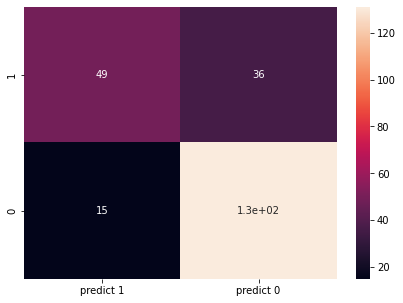

In [91]:
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm, index= [i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)


Lets analyse confusion matrix..

> we can see our model have lots of wron prediction. our model have 15 prediction diabetic but that are not diabetic in actualy and 36 prediction non diabetic but ctually that are diabetic.

> there is a big issue this model predicts 36 wrong they are actually diabetic but it is predicted non diabetic which is noot good it is dengerous situation and have to make our model perfect before deployment.








## K-nearest neighbour model

In [92]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [93]:
x=data.drop(labels='Outcome',axis=1)
y=data['Outcome']

In [94]:
from scipy.stats import zscore
XScaled=x.apply(zscore)

In [95]:
XScaled=pd.DataFrame(XScaled)
XScaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [96]:
x_train,x_test,y_train,y_test= train_test_split(XScaled, y, test_size=0.3, random_state=1)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5, weights='distance')

In [98]:
KNN.fit(x_train,y_train)


KNeighborsClassifier(weights='distance')

In [99]:
KNN_predict=KNN.predict(x_test)
KNN_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [100]:
KNN.score(x_test,y_test)

0.7705627705627706

plotting confusion matrix

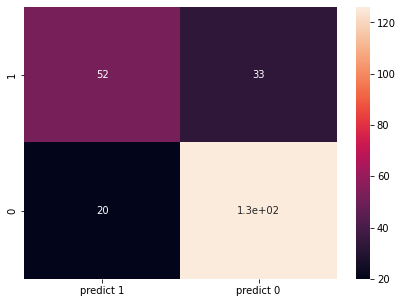

In [101]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,KNN_predict,labels=[1,0])
df_cm=pd.DataFrame(cm, index= [i for i in ["1","0"]],columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

finding best k

In [ ]:
from sklearn.model_selection import cross_val_score
score_1=[]
for i in range (1,50):                                       # for k from 1 to 50
  KNN_2 =KNeighborsClassifier(n_neighbors=i)
  score_2=cross_val_score(KNN_2,XScaled,y,cv=10)             # doing 10 iteration for each k
  score_1.append(score_2.mean())                             # storeing all 10 mean value in score list

Text(0, 0.5, 'accuracy score')

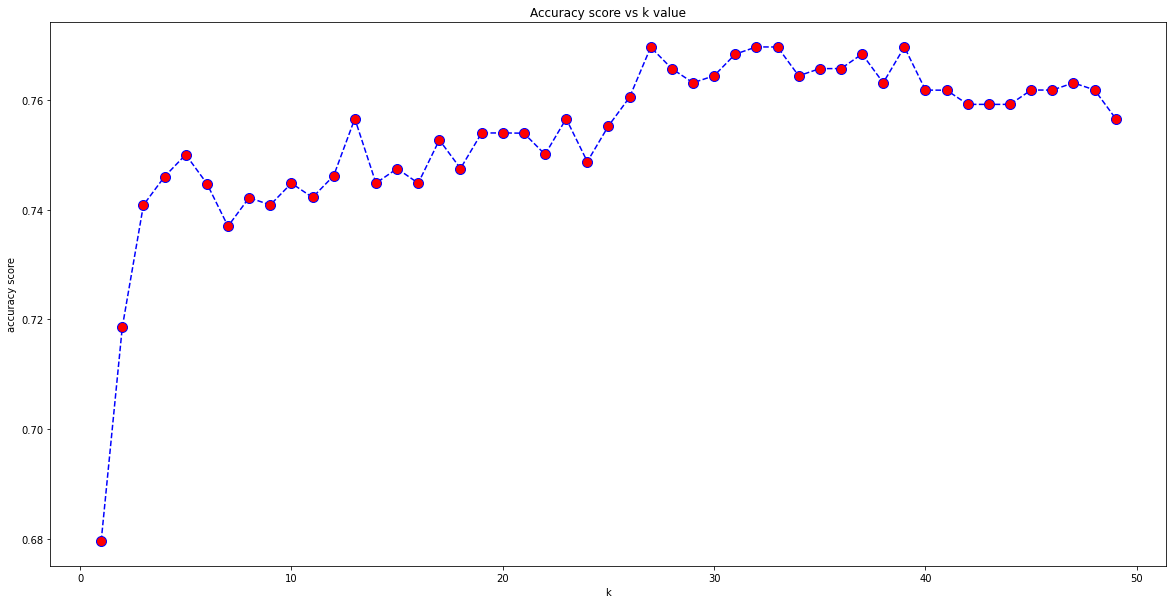

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),score_1,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy score vs k value')
plt.xlabel('k')
plt.ylabel('accuracy score')

## ANN

In [ ]:
import numpy as np
from numpy import loadtxt
import keras
from keras.models import Sequential
from keras.layers import Dense 

In [ ]:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,55,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
x=data_copy.iloc[:,0:8]
y=data_copy['Outcome']


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=1)

### define keras model

Sequential -- it arranges of all the layes, Dense--it stand for neuron deeply connected with each other

In [ ]:
model = Sequential()
model.add(Dense(units = 12, input_dim=8,activation='relu'))    # input first layer has 8 nodes and 2nd hidden layer have 12 nodes
model.add(Dense(units=20,activation='relu'))                   # 3rd hidden layer of 13 nodes
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=9,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### fitting keras model

assign value of epochs and batch_size. epoch-- no of cycles to run the all dataset by model to fix weights using back propogation., batch_size-- it is size of data rows that i want to give first to build model(it is concept which is alternate of full dataset can not run on ram so it helps to run on the ram in the form of small packets. )

In [ ]:
H=model.fit(x_train,y_train,epochs=200,batch_size=8,validation_split=0.3)

Epoch 1/200
54/54 [==============================] - 1s 7ms/step - loss: 1.0755 - accuracy: 0.5548 - val_loss: 0.6773 - val_accuracy: 0.5838
Epoch 2/200
54/54 [==============================] - 0s 4ms/step - loss: 0.6233 - accuracy: 0.6550 - val_loss: 0.6419 - val_accuracy: 0.6432
Epoch 3/200
54/54 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.6783 - val_loss: 0.6265 - val_accuracy: 0.6324
Epoch 4/200
54/54 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6830 - val_loss: 0.6864 - val_accuracy: 0.6432
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.6690 - val_loss: 0.5965 - val_accuracy: 0.6703
Epoch 6/200
54/54 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.6830 - val_loss: 0.6313 - val_accuracy: 0.6054
Epoch 7/200
54/54 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.6923 - val_loss: 0.5772 - val_accuracy: 0.6919
Epoch 8/200
5

### Evaluate keras model

Acuuracy on test data

In [ ]:
loss, acuuracy=model.evaluate(x_test,y_test)
#print('accuracy:',acuuracy,'loss:',loss)

5/5 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7338


Acurracy on train data

In [ ]:
loss, acuuracy=model.evaluate(x_train,y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7834


we can see accuracy evaluation of test data is 70% but acuuracy evaluation of train data is 81% which is 10% more that test data so we can say our model is overfitted and we have to handle overfitting

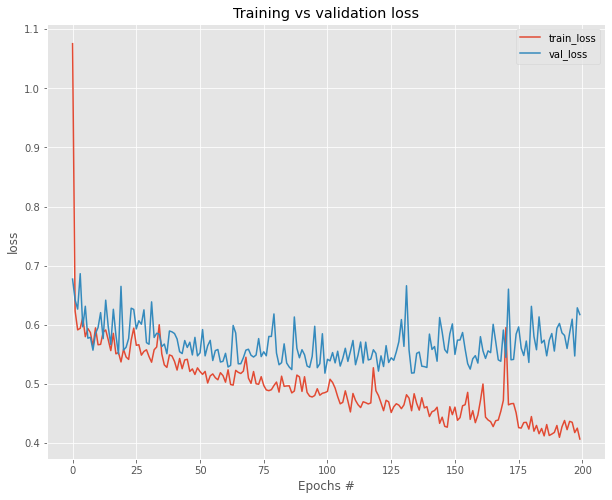

In [ ]:
import matplotlib.pyplot as plt
epochs=np.arange(0,len(H.history['loss'])) 
plt.figure(figsize=(10,8))

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label="train_loss")
plt.plot(epochs, H.history['val_loss'], label="val_loss")
plt.title("Training vs validation loss")
plt.xlabel("Epochs #")
plt.ylabel("loss")
plt.legend()

### Fixing overfitting of neurals 

There are many technique to solve overfitting
1. **Simplify the complexity of model**-- dropping some extra hidden layer (extra hidden layer also makes overfitting)
2. **L2 Regularization**-- it introduces new cost function
3. **Drop out**-- in this insert a drop out hidden layer which internaly stops fireup which has low weight of probabilty
4. **Early stopping**--
5. **Data Augmentation** 






### Applying L2 Regularisation using keras:

In [ ]:
import tensorflow as tf

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(12, input_dim=8, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),     # applying regularizar with extra weight reduction of 0.1
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3)


Epoch 1/100
54/54 [==============================] - 1s 7ms/step - loss: 1.8070 - accuracy: 0.5455 - val_loss: 1.4903 - val_accuracy: 0.4919
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 1.3816 - accuracy: 0.6037 - val_loss: 1.3298 - val_accuracy: 0.5730
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 1.2809 - accuracy: 0.6294 - val_loss: 1.3086 - val_accuracy: 0.5892
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 1.1686 - accuracy: 0.6480 - val_loss: 1.2201 - val_accuracy: 0.6108
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0905 - accuracy: 0.6690 - val_loss: 1.1119 - val_accuracy: 0.6324
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.6760 - val_loss: 1.1313 - val_accuracy: 0.6162
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 1.0033 - accuracy: 0.6690 - val_loss: 1.0589 - val_accuracy: 0.6216
Epoch 8/100
5

In [ ]:
loss, acuuracy=model.evaluate(x_test,y_test)


5/5 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.7468


In [ ]:
loss, acuuracy=model.evaluate(x_train,y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7427


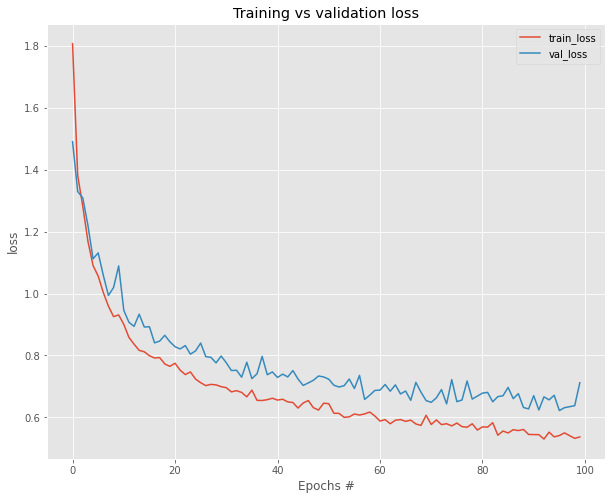

In [ ]:
import matplotlib.pyplot as plt
epochs=np.arange(0,len(H.history['loss']))
plt.figure(figsize=(10,8))

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label="train_loss")
plt.plot(epochs, H.history['val_loss'], label="val_loss")
plt.title("Training vs validation loss")
plt.xlabel("Epochs #")
plt.ylabel("loss")
plt.legend()